<h1><center>ParuVendu</center></h1>
<h2><center>Visualisation des axes d'analyse</center></h2>

### Objectifs : 

Le but de cette partie est d'analyser des axes choisis. De notre côté, nous avons choisi les axes suivants :  

**Axe 1 : Prix**

* Evolution du prix moyen par date
* Prix moyen par ville/département
* Prix moyen par type de bien
* Répartition des prix des biens par : dépendance, annexes, pièces et surface

**Axe 2 : Nombre d'annonces**

* Répartition du nombre d'annonces par département
* Répartition du nombre d'annonces par type du bien
* Répartition du nombre d'annonces par dependance
* Répartition du nombre d'annonces par annexe


Après la partie de l'analyse des axes, nous avons fait quelques analyses sur certains champs de la table des données.


### Librables :

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

from datetime import datetime
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
plt.style.use('seaborn-dark-palette')

In [3]:
data=pd.read_csv("tmp_data/preprocessed_final_table.csv")
data

,id,url,lb_type_bien,ville,price,pieces,surface,date_annonce,dependance,annexe,classe_energie,gaz_effet_serre
0,1260694776,https://www.paruvendu.fr/immobilier/vente/mais...,Maison,La Ferté-Gaucher (77320),97500,3,101,03/09/2022,NC,NC,E,B
1,1263297361,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,Versailles (78000),499000,3,74,03/09/2022,Balcon,Parking,C,D
2,1263773523,https://www.paruvendu.fr/immobilier/vente/dupl...,Duplex/triplex,Sevran (93270),226000,NC,78,03/09/2022,NC,NC,C,C
3,1263773560,https://www.paruvendu.fr/immobilier/prestige/m...,Maison,Chaville (92370),927000,7,118,03/09/2022,NC,Parking,NC,NC
4,1263773532,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,Vélizy-Villacoublay (78140),278100,3,61,03/09/2022,Balcon,Cave,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
11989,1262455056,https://www.paruvendu.fr/immobilier/vente/appa...,Appartement,Antony (92160),270000,3,49,07/08/2022,NC,Cave,E,B
11990,1262455210,https://www.paruvendu.fr/immobilier/vente/mais...,Maison,Boissettes (77350),192500,4,70,07/08/2022,Terrasse,Parking,NC,NC
11991,1262457010,https://www.paruvendu.fr/immobilier/vente/mais...,Maison,Avon (77210),529000,6,129,07/08/2022,Terrasse,NC,C,C
11992,1262455481,https://www.paruvendu.fr/immobilier/vente/mais...,Maison,Sarcelles (95200),411000,5,145,07/08/2022,NC,Box,E,F


<h2><center>Axe prix des biens</center></h2>

### 1 - Axe des prix des biens

On zoom d'abord sur la distribution des prix des biens

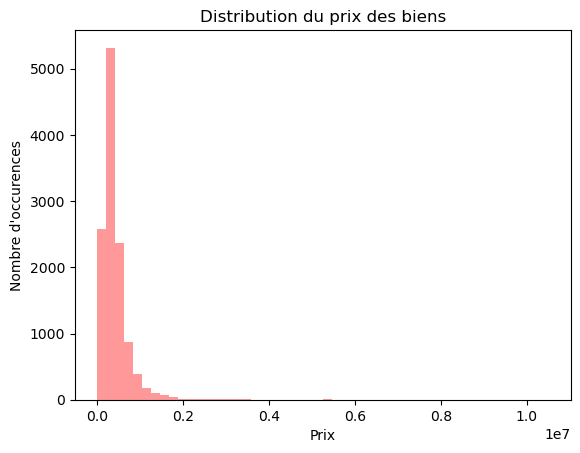

In [4]:
sns.distplot(data['price'], color="r", kde=False)
plt.title("Distribution du prix des biens")
plt.ylabel("Nombre d'occurences")
plt.xlabel("Prix")
plt.show()

On remarque qu'il y a des pics, ces valeurs peuvent biaisés les analyses si on veut mener l'étude encore plus loin.
Méthode possible pour corriger cela c'est de regarder les percentiles et prendre celui à 99.5 et filtrer par conséquent sur ce seuil là pour enlever les outliers

#### a - Evolution du prix moyen par date

Afin d'afficher l'évolution du prix par date nous allons d'abord sélectionner les colonnes qui nous intéressent, soit : la date et le prix. Par la suite, nous supprimons les lignes avec des valeurs "NC" sur la date car cela ne nous apporte aucune information. Ensuite, ous allons calculer la moyenne par date car il y a plusieurs valeurs de prix par date.
Et finalement nous allons afficher la courbe d'évolution.

In [5]:
df_dates=data[["date_annonce","price"]]

## on drop les rows with NC values
df_dates=df_dates[df_dates["date_annonce"]!="NC"]

D'abord on va afficher chaque percentile du prix par date.  
Pour une question de lecture de graphe, nous allons convertir la date en id_mois puisqu'on sait qu'on est sur les mois 08 & 09 de 2022. Par conséquent on va convertir par exemple 01/08/2022 en 0108

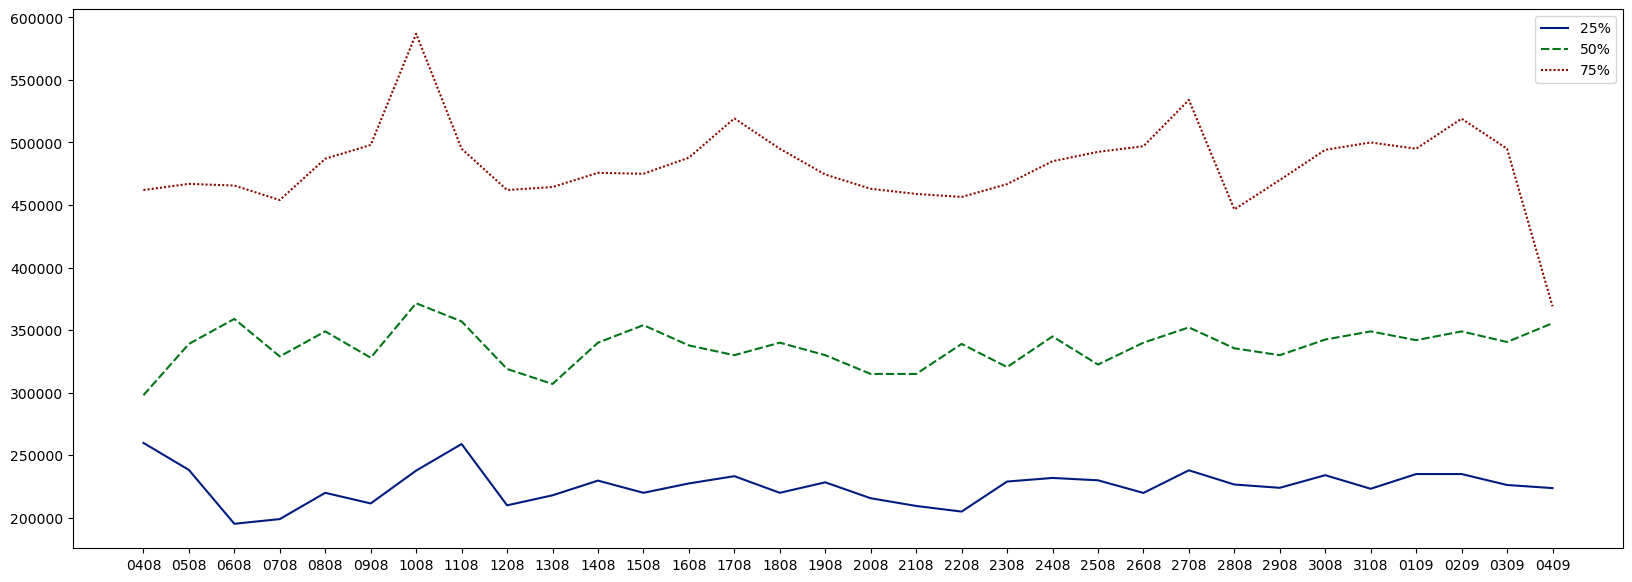

In [6]:
tmp = df_dates.copy()

tmp["date_annonce"]=tmp["date_annonce"].apply(lambda x: int(str(x)[:6].split("/")[1]+str(x)[:6].split("/")[0]))
tmp=tmp.groupby(['date_annonce']).describe()["price"].sort_index()

def restructure_index(x):
    indexe = str(x)
    return indexe[1:]+"0"+indexe[0]
tmp.index=[restructure_index(i) for i in tmp.index]


plt.figure(figsize=[20, 7])
sns.lineplot(data=tmp[['25%', '50%', '75%']])
plt.show()

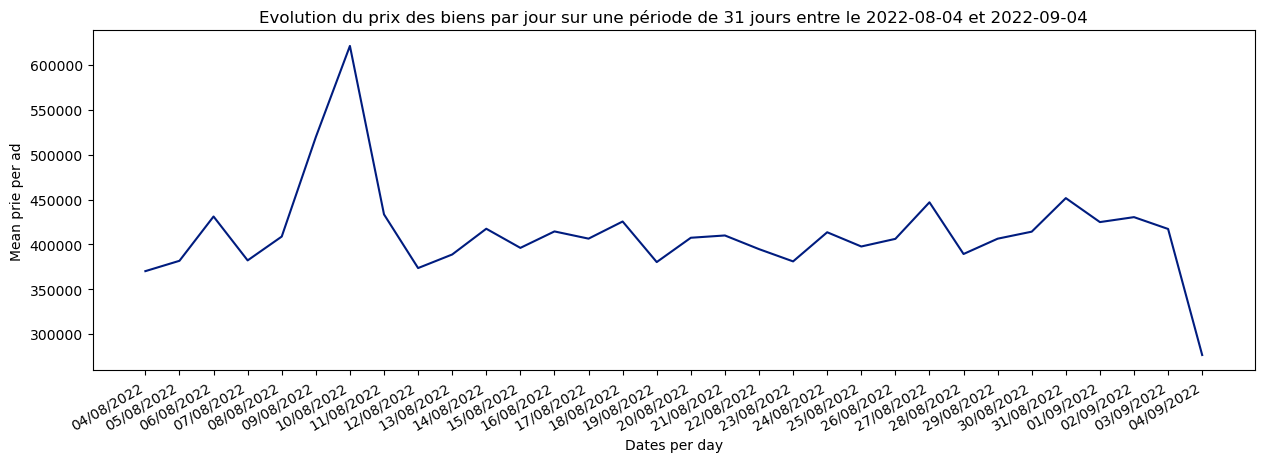

In [7]:
##  on calcule la moyenne des prix par jour
dfdates=pd.DataFrame(df_dates.groupby("date_annonce")["price"].mean()).reset_index()
dfdates["mean_price"]=dfdates.price.apply(lambda x:round(x))

dfdates.drop("price",axis=1,inplace=True)

####################################################################################

def configure_id_mois(x):
    tmp=str(x).split("/")
    return int(tmp[1]+tmp[0])
    
dfdates["id_mois"]=dfdates.date_annonce.apply(lambda x: configure_id_mois(x))

dfdates=dfdates.sort_values(by=["id_mois"])

dfdates.drop("id_mois",inplace=True,axis=1)

####################################################################################
plt.figure(figsize=[15, 5])
plt.plot(dfdates.date_annonce, dfdates['mean_price']) 
plt.xlabel('Dates per day') 
plt.ylabel('Mean prie per ad') 
plt.title("Evolution du prix des biens par jour sur une période de 31 jours entre le 2022-08-04 et 2022-09-04")
plt.gcf().autofmt_xdate()


#### b - Prix moyen par ville

Dans cette partie on va voir comment le prix évolue par ville/commune de l'île de France

In [8]:
data_ville=data[["ville","price"]]

In [9]:
meanpriceperyear=data_ville.copy()
meanpriceperyear["ville"]=meanpriceperyear["ville"].apply(lambda x:re.sub("[0-9()]+",'',x))

meanpriceperyear=pd.DataFrame(meanpriceperyear.groupby("ville")["price"].mean()).reset_index()
meanpriceperyear["prix_moyen"]=meanpriceperyear.price.apply(lambda x:round(x))

meanpriceperyear=meanpriceperyear.drop("price",axis=1).sort_values(by="prix_moyen",ascending=False).reset_index(drop=True)


somme_prix=sum(meanpriceperyear.prix_moyen)
meanpriceperyear["percentage"]=meanpriceperyear.prix_moyen.apply(lambda x: (x/somme_prix)*100)

meanpriceperyear[meanpriceperyear["percentage"]>0.5]

,ville,prix_moyen,percentage
0,Courquetaine,2200000,0.601399
1,Morsang-sur-Seine,1995000,0.545360
2,Saint-Hilaire,1877400,0.513212


On remarque que seulement 3 villes qui représentent un grand % sur tous les prix moyens.

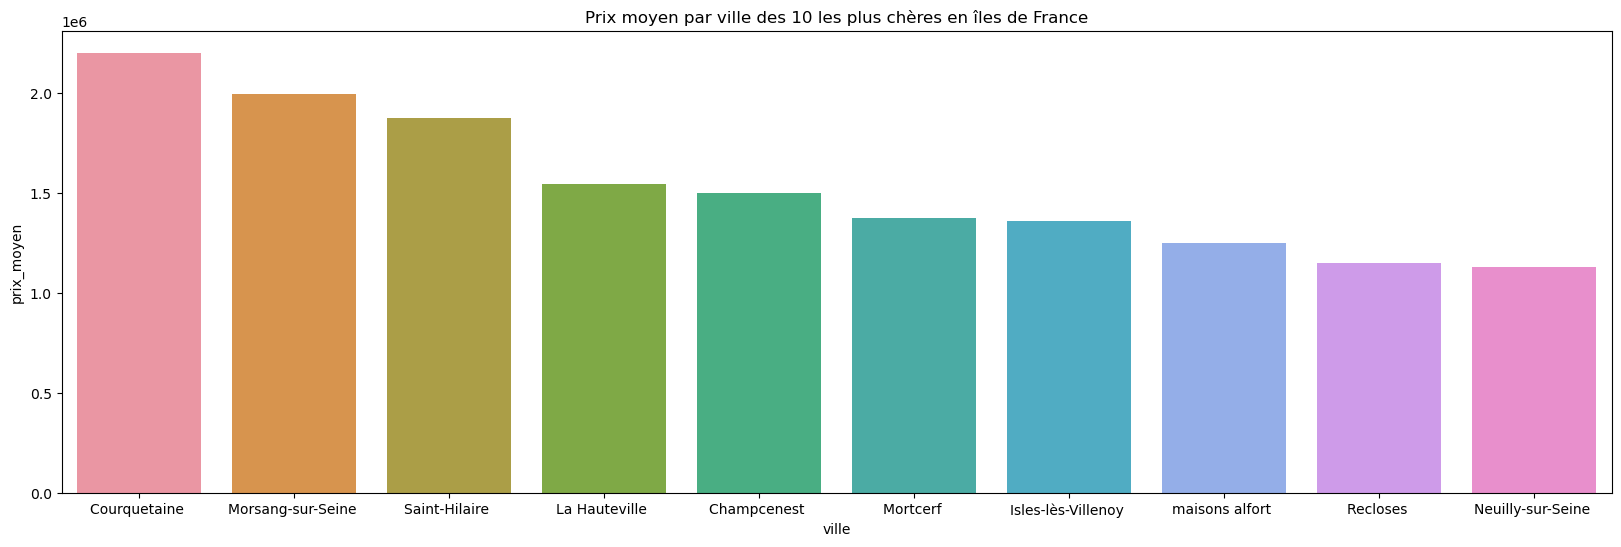

In [10]:
plt.figure(figsize=[20, 6])
sns.barplot(meanpriceperyear.head(10).ville,meanpriceperyear.head(10).prix_moyen)
plt.title("Prix moyen par ville des 10 les plus chères en îles de France")
plt.show()

In [11]:
meanpriceperyear.shape

(946, 3)

Puisque la totalité des villes ne peut pas être représentée puisque nous sommes sur un périmère de 946 en distincts. Nous allons regarder le prix moyen par département

In [12]:
data_ville["departement"]=data_ville["ville"].apply(lambda x: str(75) if ('paris' in x.lower()) 
                                                    else  str(re.sub('\D', '', x)[:2]))

meanprice_per_dpt=pd.DataFrame(data_ville.drop("ville",axis=1).groupby("departement")["price"].mean()).reset_index()
meanprice_per_dpt["prix_moyen"]=meanprice_per_dpt.price.apply(lambda x:round(x))
meanprice_per_dpt.drop("price",axis=1,inplace=True)

meanprice_per_dpt.sort_values(by="prix_moyen",inplace=True)

meanprice_per_dpt

,departement,prix_moyen
1,77,320307
3,91,327274
7,95,347291
5,93,355033
2,78,424545
6,94,425476
4,92,578770
0,75,727898


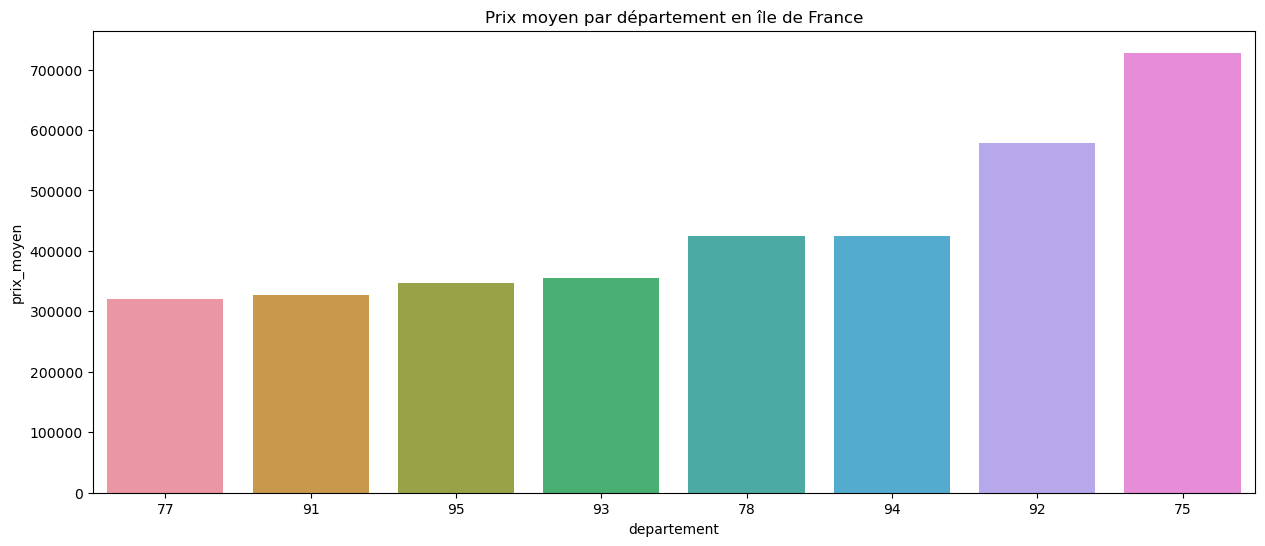

In [13]:
plt.figure(figsize=[15, 6])
plt.title("Prix moyen par département en île de France")
sns.barplot(meanprice_per_dpt.departement,meanprice_per_dpt.prix_moyen)
plt.show()

Les derniers résultats par départment semblent plus logique. En effet, Paris (75) est la plus chère.

On avait pas ce résultat avant avec les villes parce qu'on avait les prix par arrondissement vs les prix moyens des autres villes, ce qui n'est pas comparable à cette échelle

#### c - Prix moyen par type de bien

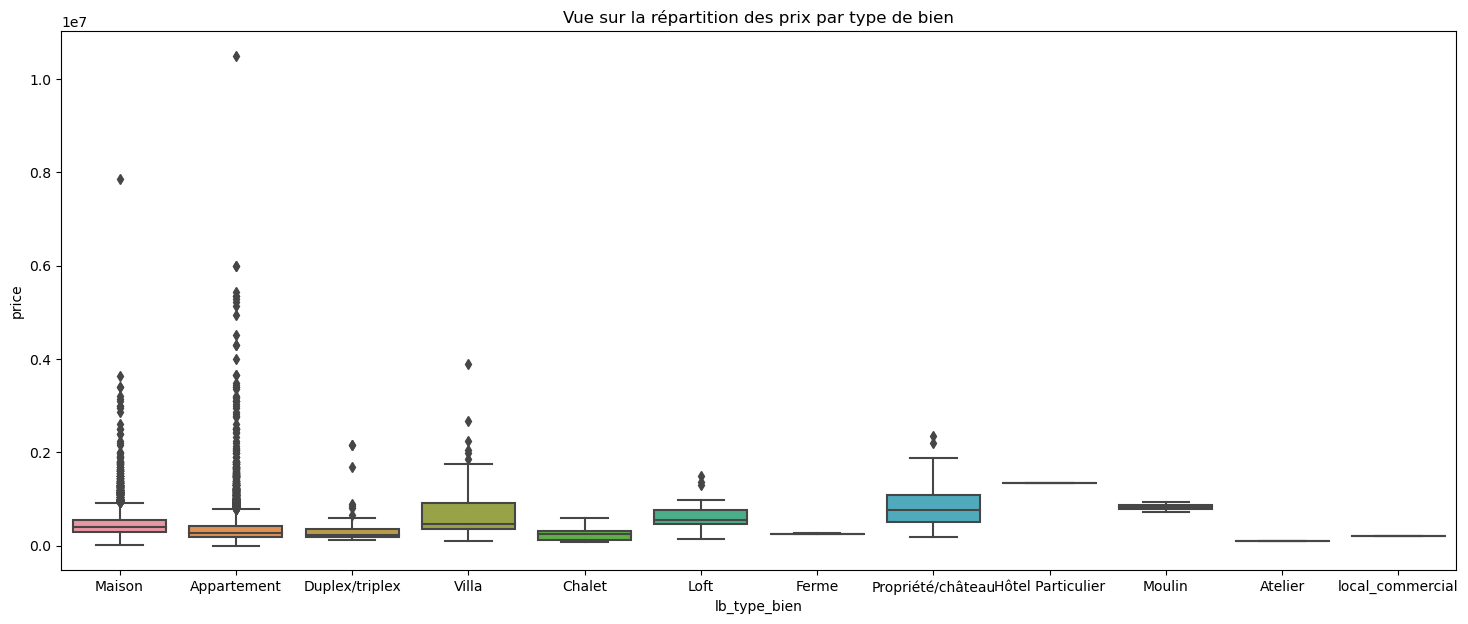

In [14]:
plt.figure(figsize=[18, 7])
plt.title("Vue sur la répartition des prix par type de bien")
sns.boxplot("lb_type_bien","price",data=data[["lb_type_bien","price"]]);

In [15]:
prix_bien=pd.DataFrame(data[["lb_type_bien","price"]].groupby("lb_type_bien")["price"].mean()).reset_index()
prix_bien["prix_moyen"]=prix_bien.price.apply(lambda x:round(x))
prix_bien.drop("price",axis=1,inplace=True)
prix_bien.sort_values(by="prix_moyen",inplace=True)

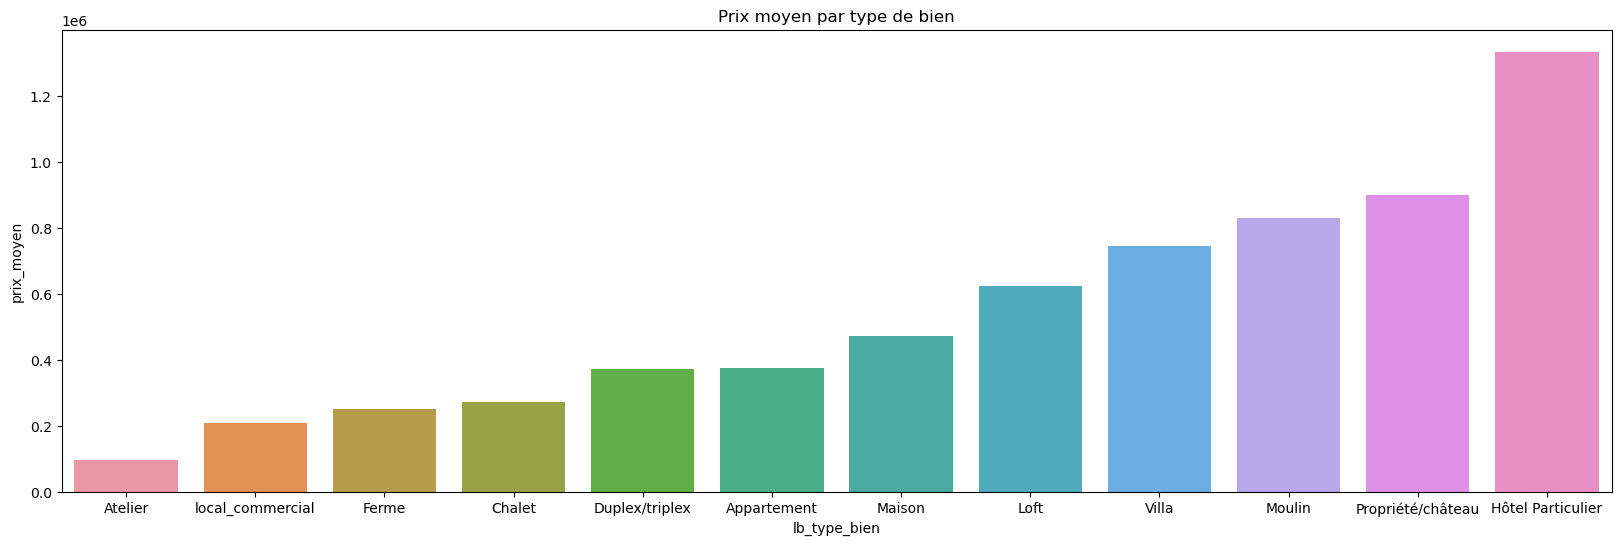

In [16]:
plt.figure(figsize=[20, 6])
sns.barplot("lb_type_bien","prix_moyen",data=prix_bien)
plt.title("Prix moyen par type de bien")
plt.show()

La répartition parait cohérente avec la réalité. Les prix des apprtements est au milieu du range entre les extrêmes (hôtel & atelier)

#### d - Répartition des prix des biens par : dependance, pieces, annexe et surface

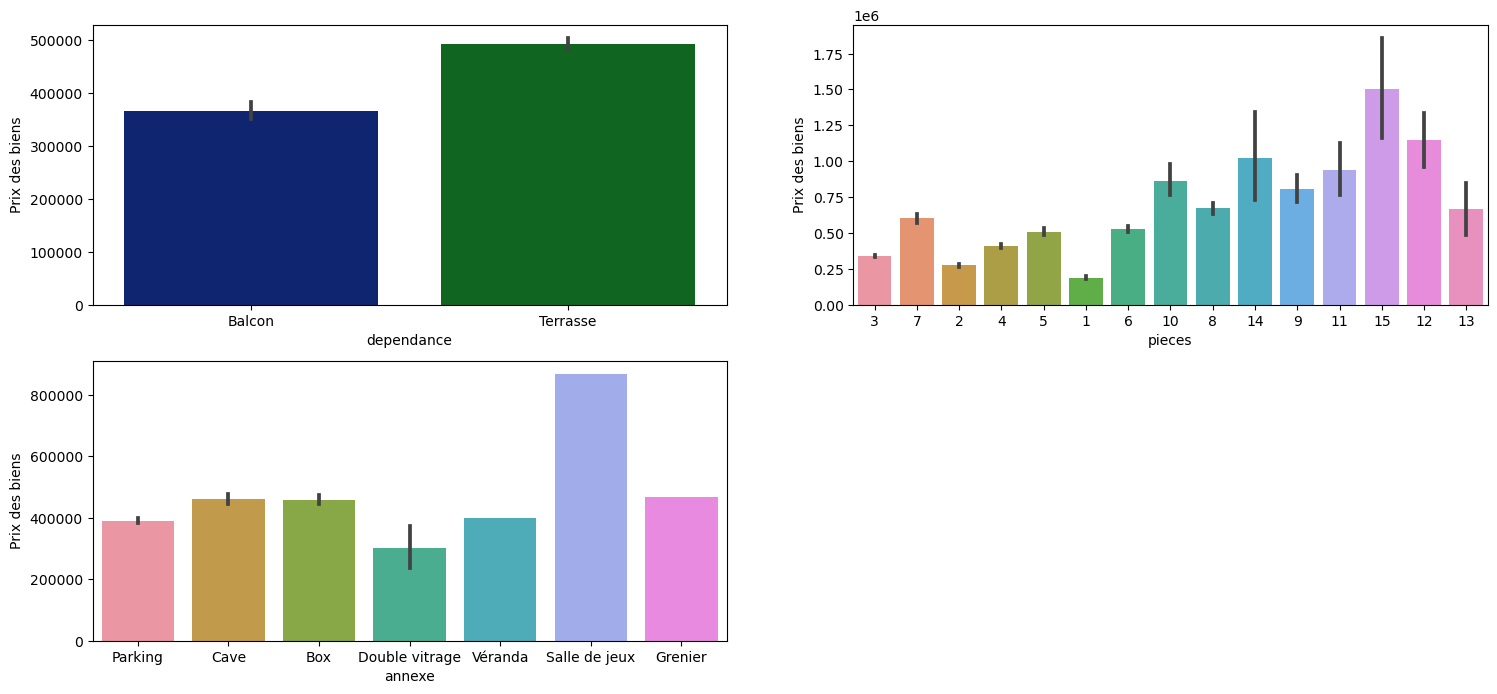

In [17]:
                        #################### dependance, pieces, annexe ####################


plt.figure(figsize=[18,8])
counter=1

for c in ["dependance","pieces","annexe"]:
    
    plt.subplot(2, 2, counter)
    
    tmp=data[data[c]!="NC"]
    sns.barplot(tmp[c],tmp["price"])
    #plt.title(c+" Vs Price ")
    plt.ylabel("Prix des biens")
    plt.xlabel(c)
    counter+=1

plt.gcf();

In [18]:
                        #################### SURFACE ####################

df_surface=data[data["surface"]!="NC"]

df_surface["surface"] = df_surface["surface"].apply(lambda x:round(int(x)))

On remarque qu'il y a beaucoup d'outliers. Nous allons donc les enlever avant d'afficher la répartition du prix par surface

374.0


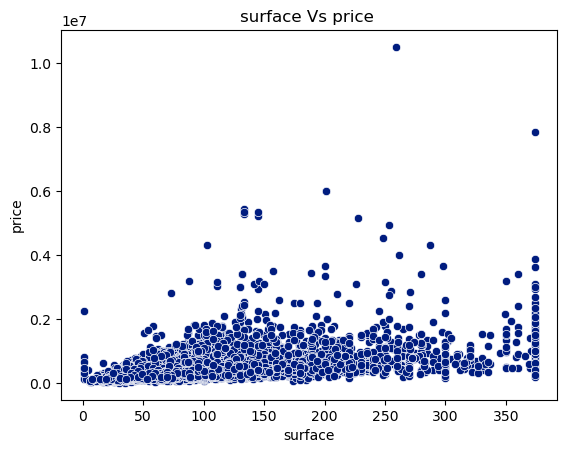

In [19]:
upperlimit = np.percentile(df_surface.surface.values, 99.5)
print(upperlimit)

df_surface['surface'].iloc[df_surface['surface']>upperlimit] = upperlimit

sns.scatterplot(df_surface.surface, df_surface["price"].values)
plt.title("surface Vs price ")
plt.ylabel("price")
plt.xlabel("surface")
plt.show();

Du graphe, les outliers (après le 99.5 percentiles soit une surface plus de 374) ont les prix des biens >= 2000000

##   ****************************   *********************************************** ***************************************

Même avec ça on a beaucoup de valeurs pour la surface. Ce qu'on peut faire c'est créer des intervalles/classes pour pouvoir voir la répartition des prix selon la catégorie des nombres de pièces.  


La classification choisie, est un résultat d'une réflexion sur la vie réelle. On a plus tendance à chercher un appartement avec 3-4 pièces selon bien sûr la situation. Par conséquent, avoir plus de 5 - 6 pièces voir 10 ça devient beaucoup et ça indique des cas particuliers comme hotel ou autre.

In [20]:
def class_surface(x):
    if x >=20 :
        return "[1,20] m²"
    
    elif (20 < x and x <=50):
        return "[20,50] m²"
    
    elif (50 < x and x <=100):
        return "[50,100] m²"
    
    else :
        return "plus de 100 m2"

df_surface["surface_class"]=df_surface["surface"].apply(lambda x:class_surface(x))

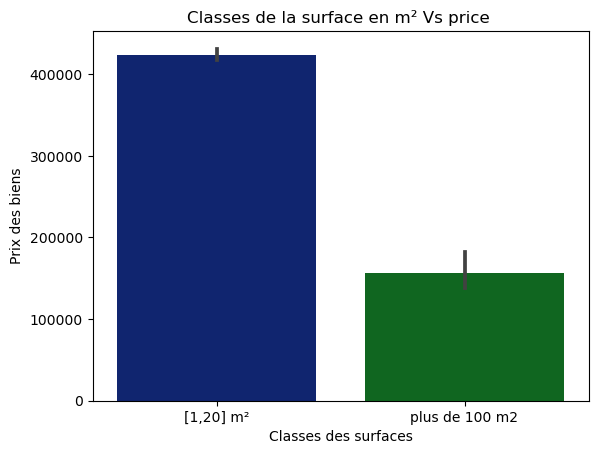

In [21]:
sns.barplot(df_surface.surface_class, df_surface["price"].values)
plt.title("Classes de la surface en m² Vs price ")
plt.ylabel("Prix des biens")
plt.xlabel("Classes des surfaces")
plt.gcf();

De toute évidence plus le nombre de pièces augmentent plus le prix du bien augmente. On en déduit une corrélation entre les deux colonnes qu'on peut visualiser avec une heatmap comme suit :

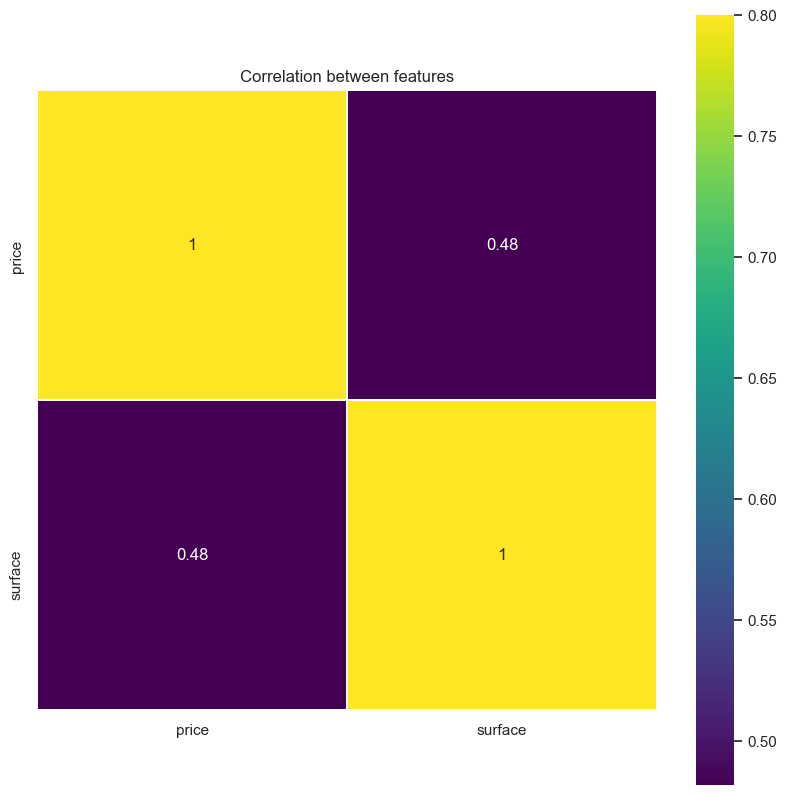

In [22]:
corrMatrix=df_surface[['price', 'surface']].corr()

sns.set(font_scale=1)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

<h2><center>Axe nombres annonces</center></h2>

un zoom sur la répation des nombres d'annonces par champ

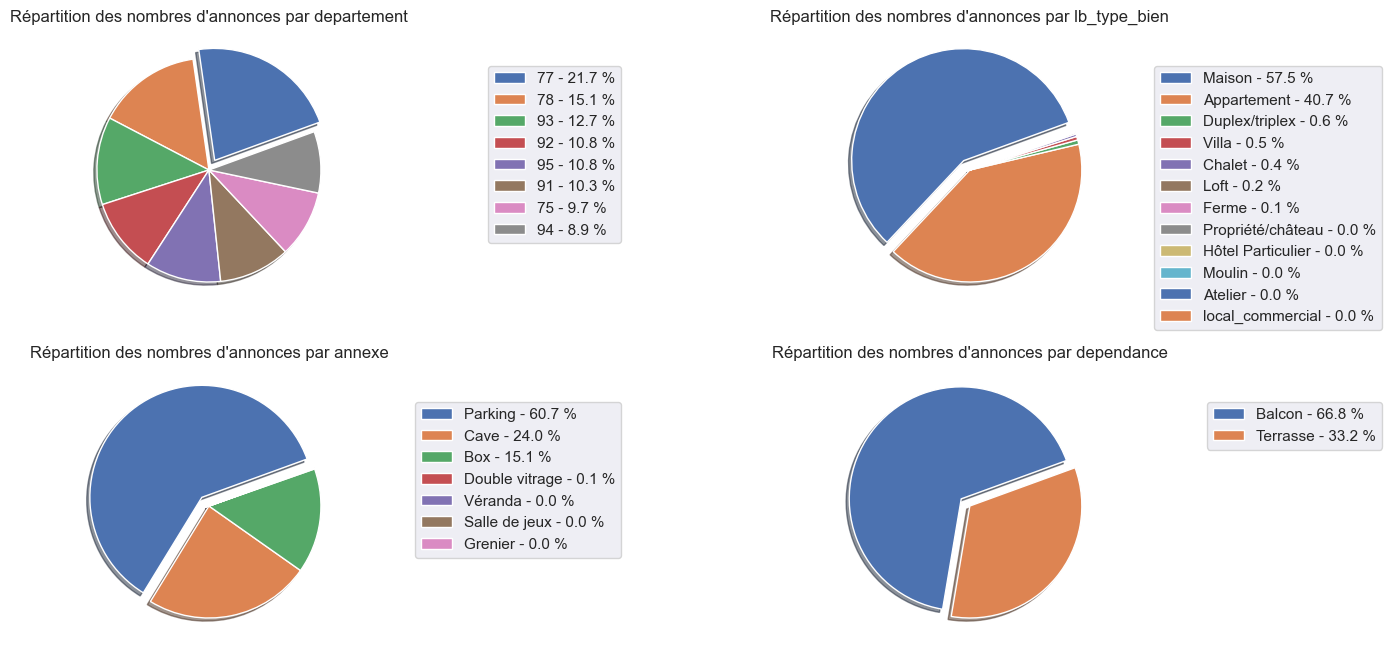

In [23]:
plt.figure(figsize=[18,8])
counter=1


df_nb_annonce=data.copy()
df_nb_annonce["departement"] = df_nb_annonce["ville"].apply(lambda x: str(75) if ('paris' in x.lower()) 
                                                    else  str(re.sub('\D', '', x)[:2]))

for c in ["departement","lb_type_bien","annexe","dependance"]:
    
    plt.subplot(2, 2, counter)
    
    tmp=df_nb_annonce[df_nb_annonce[c]!="NC"]
    
    labels = tmp[c].unique()
    sizes = tmp[c].value_counts().values
    explode= [0]*len(labels)
    explode[0]=0.1
    parcent = 100.*sizes/sizes.sum()
    labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

    #colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
    patches, texts= plt.pie(sizes, explode=explode, shadow=True,startangle=20)
    plt.legend(patches, labels, loc="upper right",bbox_to_anchor=(2, 0.9))

    plt.title("Répartition des nombres d'annonces par " + c)
    
    counter+=1

plt.show();

### Analyse des champs


#### Classes énergétiques

Répartition en % des classes des indicateurs énergétiques

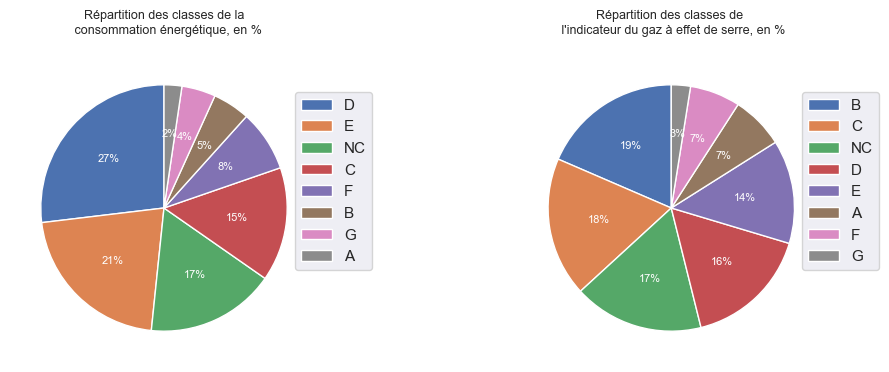

In [30]:
plt.figure(figsize=[12, 4]) # dimension du graphique

plt.subplot(1, 2, 1)

dct=dict(data.classe_energie.value_counts())

a = list(dct.keys())
b = list(dct.values())

plt.pie(b, labels=a, startangle=90, autopct='%1.0f%%', textprops={'fontsize': 8,'color':"white"})
        
plt.legend(a, loc="upper right",bbox_to_anchor=(1.2, 0.9))

#################################################
plt.subplot(1, 2, 2)
dct=dict(data.gaz_effet_serre.value_counts())

a = list(dct.keys())
b = list(dct.values())

plt.pie(b, labels=a, startangle=90, autopct='%1.0f%%', 
        textprops={'fontsize': 8,'color':"white"})
plt.legend(a, loc="upper right",bbox_to_anchor=(1.2, 0.9))

plt.text(x=-0, y=1.5, s='Répartition des classes de \n l\'indicateur du gaz à effet de serre, en %', 
         fontsize=9, ha='center', va='center')
plt.text(x=-4.1, y=1.5, s='Répartition des classes de la \n consommation énergétique, en %', 
         fontsize=9, ha='center', va='center')
plt.show()

#### intéraction des champs : libellé du type des biens, surface et nombre des pièces

On remarquera que les pics représentent la forte intéraction entre les 3. Par exemple : pour un nombre de pièces à 7 et pour une maison nous avons un pic de surface (classe >100m²)

<Figure size 3000x500 with 0 Axes>

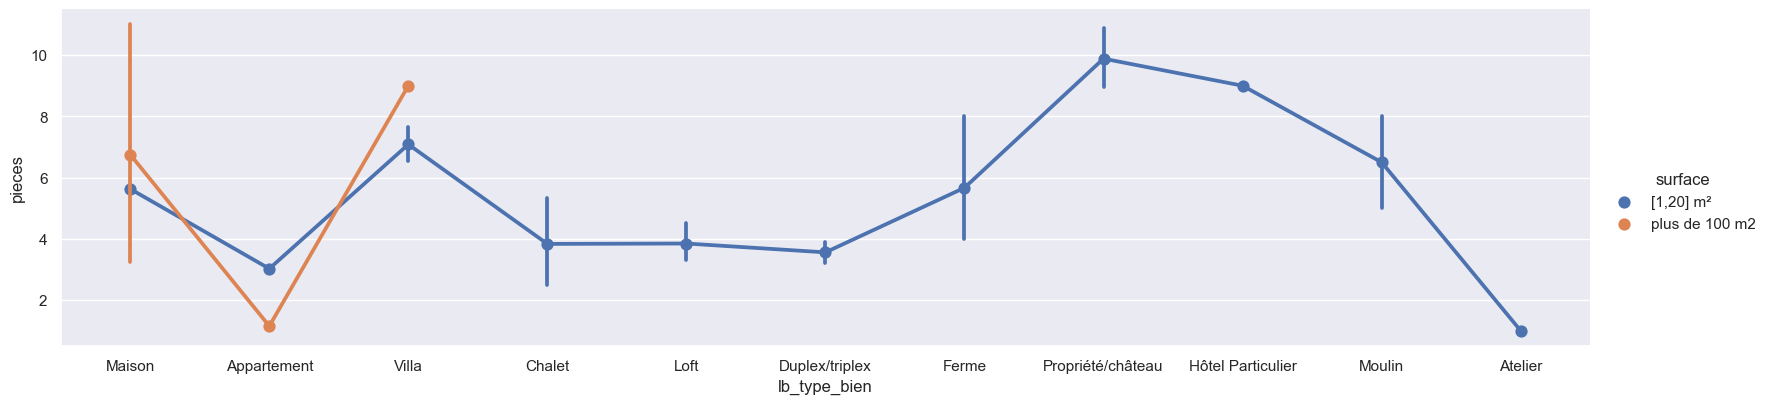

In [25]:
tmp=data[["lb_type_bien","surface","pieces"]]

for c in tmp.columns:
    tmp=tmp[tmp[c]!="NC"]
    
def class_surface(x):
    if x >=20 :
        return "[1,20] m²"
    
    elif (20 < x and x <=50):
        return "[20,50] m²"
    
    elif (50 < x and x <=100):
        return "[50,100] m²"
    
    else :
        return "plus de 100 m2"
    
tmp["surface"]=tmp["surface"].apply(lambda x:class_surface(int(x)))

tmp["pieces"]=tmp["pieces"].apply(lambda x:int(x))


plt.figure(figsize=[30,5])
sns.factorplot("lb_type_bien","pieces",data=tmp,hue="surface",size=4, aspect=4)
plt.show();